In [52]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from sklearn.metrics import roc_curve, auc


In [31]:
# Download necessary NLTK resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Digital
[nltk_data]     Outlet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Load dataset
file_path = 'twitter_data.csv'  # Replace with actual file path
data = pd.read_csv(file_path)

In [33]:
# Select relevant columns
data = data[['tweet', 'class']]

In [34]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

In [35]:
# Apply cleaning function
data['cleaned_tweet'] = data['tweet'].apply(clean_text)

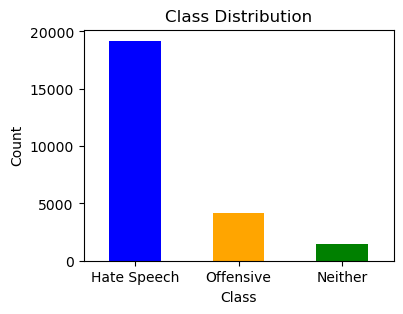

In [68]:
# Visualize class distribution
plt.figure(figsize=(4, 3))
data['class'].value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=["Hate Speech", "Offensive", "Neither"], rotation=0)
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

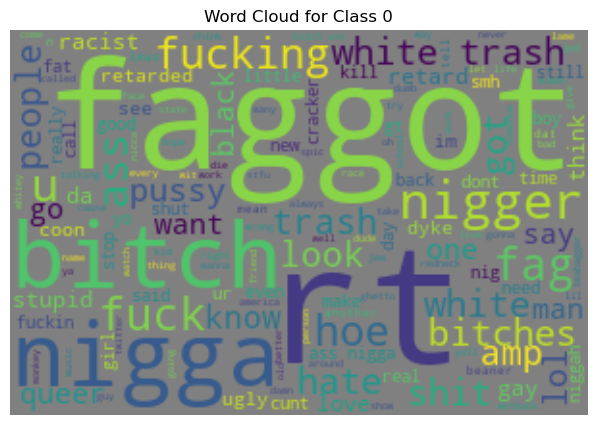

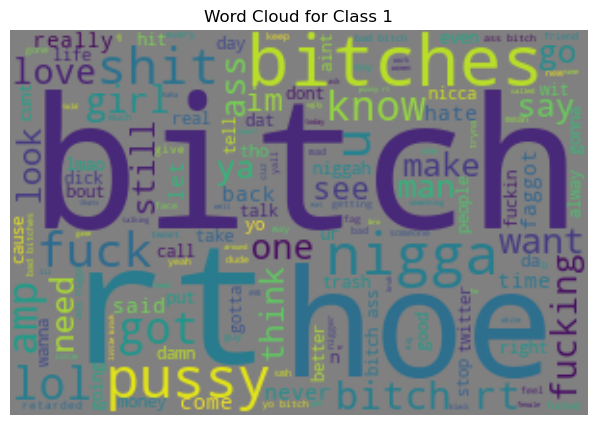

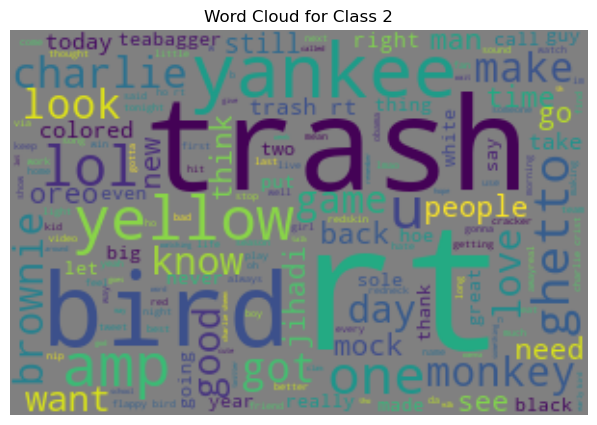

In [69]:
# Generate word clouds
for label in [0, 1, 2]:
    text = " ".join(data[data['class'] == label]['cleaned_tweet'])
    wordcloud = WordCloud(width=300, height=200, background_color='gray').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Class {label}")
    plt.axis('off')
    plt.show()

In [38]:
# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_tweet']).toarray()
y = data['class']


In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naïve Bayes": MultinomialNB()
}

Training Logistic Regression...

Logistic Regression Accuracy: 0.8983
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.17      0.25       290
           1       0.92      0.97      0.94      3832
           2       0.85      0.85      0.85       835

    accuracy                           0.90      4957
   macro avg       0.77      0.66      0.68      4957
weighted avg       0.88      0.90      0.88      4957



<Figure size 1000x600 with 0 Axes>

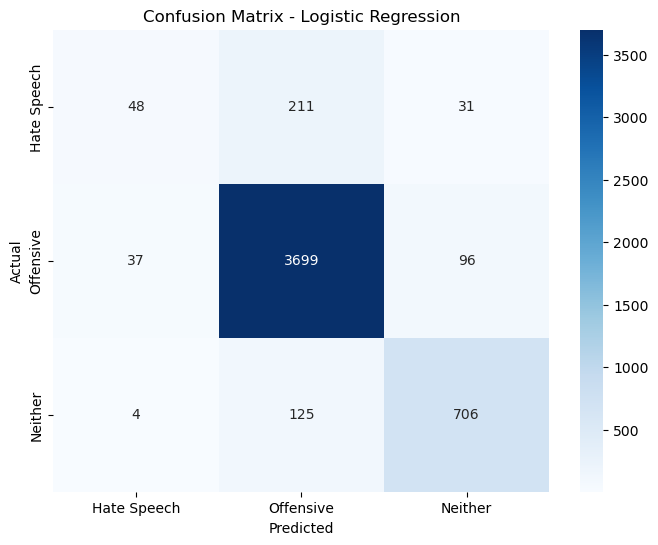

Training Random Forest...

Random Forest Accuracy: 0.8959
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.12      0.20       290
           1       0.92      0.96      0.94      3832
           2       0.81      0.89      0.85       835

    accuracy                           0.90      4957
   macro avg       0.73      0.66      0.66      4957
weighted avg       0.88      0.90      0.88      4957



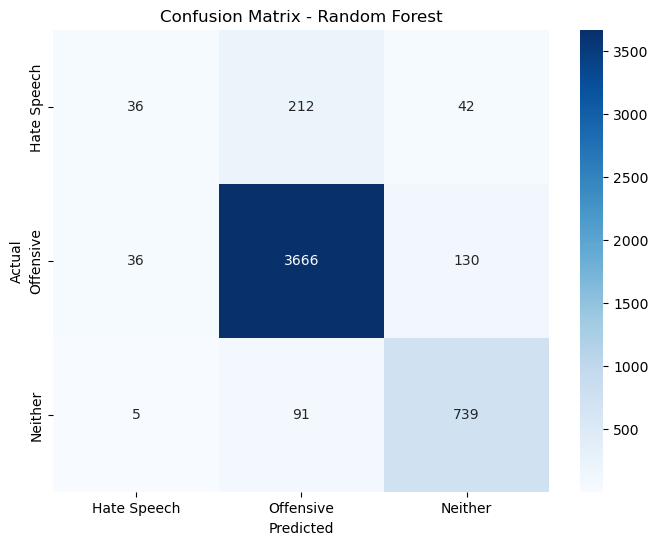

Training Naïve Bayes...

Naïve Bayes Accuracy: 0.8352
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       290
           1       0.83      0.99      0.90      3832
           2       0.88      0.41      0.56       835

    accuracy                           0.84      4957
   macro avg       0.79      0.47      0.49      4957
weighted avg       0.83      0.84      0.79      4957



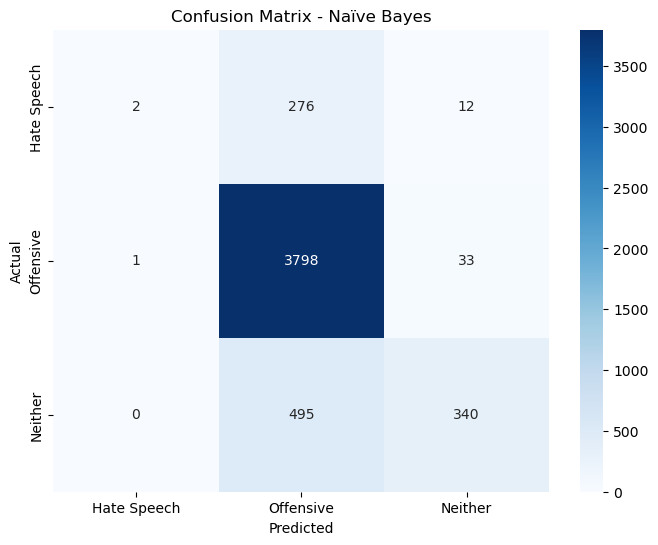

In [55]:
# Train and evaluate models
results = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Hate Speech", "Offensive", "Neither"], 
                yticklabels=["Hate Speech", "Offensive", "Neither"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

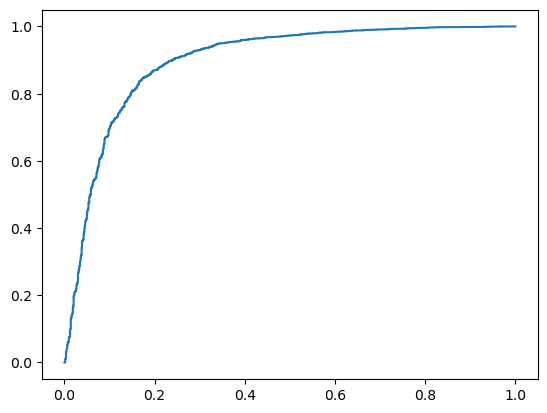

In [58]:
# Compute ROC curve and AUC
y_probs = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


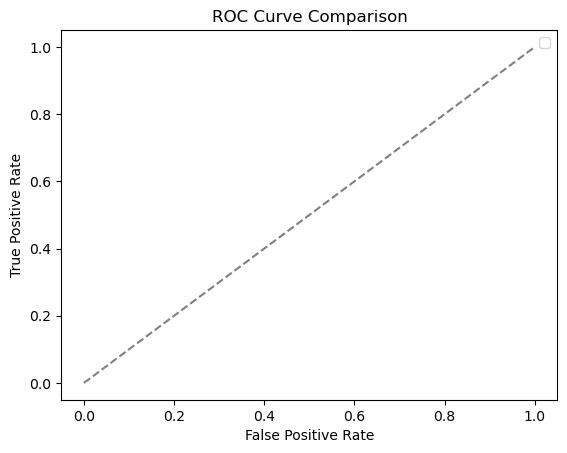

In [59]:
# Plot ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

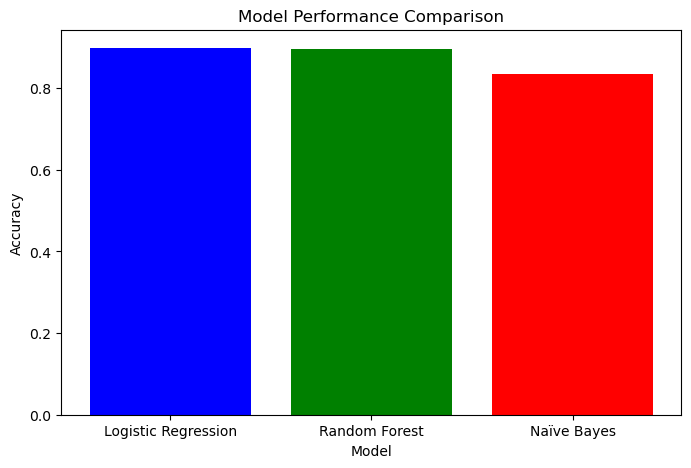

In [50]:
# Bar chart for model evaluation
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [51]:
# Suggesting the best model
best_model = max(results, key=results.get)
print(f"The best model for this project is: {best_model}")

The best model for this project is: Logistic Regression
